In [1]:
import pandas as pd
import os
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_miami.csv')

In [4]:
df.shape

(3476, 16)

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [7]:
df['location'].value_counts()

miami, fl                        2812
fort lauderdale, fl               294
miami-fort lauderdale area         80
miramar, fl                        44
plantation, fl                     44
coral gables, fl                   40
hallandale beach, fl               32
miami beach, fl                    28
hialeah, fl                        20
davie, fl                          12
miami, florida, united states      12
aventura, fl                       10
hollywood, fl                       8
opa-locka, fl                       8
dania, fl                           8
medley, fl                          6
doral, fl                           4
miami gardens, fl                   4
north miami beach, fl               2
university park, fl                 2
miami lakes, fl                     2
cooper city, fl                     2
sunny isles, fl                     2
Name: location, dtype: int64

In [8]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,software engineer,148
1,senior software engineer,102
2,android engineer,84
3,android developer,70
4,ios developer,38
5,full stack developer,36
6,ios software engineer,26
7,software engineer i ii backend,26
8,senior software engineer android,24
9,senior react native mobile engineer,24


In [9]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [10]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile development' in y) or ('mobile developer' in y):
            return 'keep'
        elif ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'      

In [11]:
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [12]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [13]:
df.shape

(1618, 15)

# Top Companies Hiring

In [14]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,recruiting from scratch,120
1,perficient,88
2,twitter,76
3,ziprecruiter,72
4,agoda,68
5,globant,64
6,citrix,54
7,dice,48
8,vmware,42
9,affirm,42


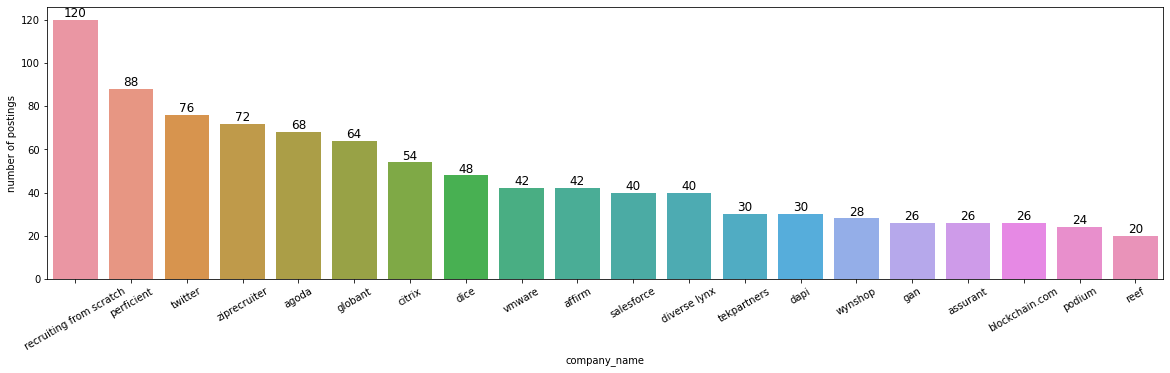

In [15]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions 

In [16]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,android engineer,84
1,android developer,70
2,ios developer,38
3,software engineer,34
4,ios software engineer,26
5,android kotlin developer,24
6,senior react native mobile engineer,24
7,senior software engineer android,24
8,sr ios developer,22
9,senior android developer,20


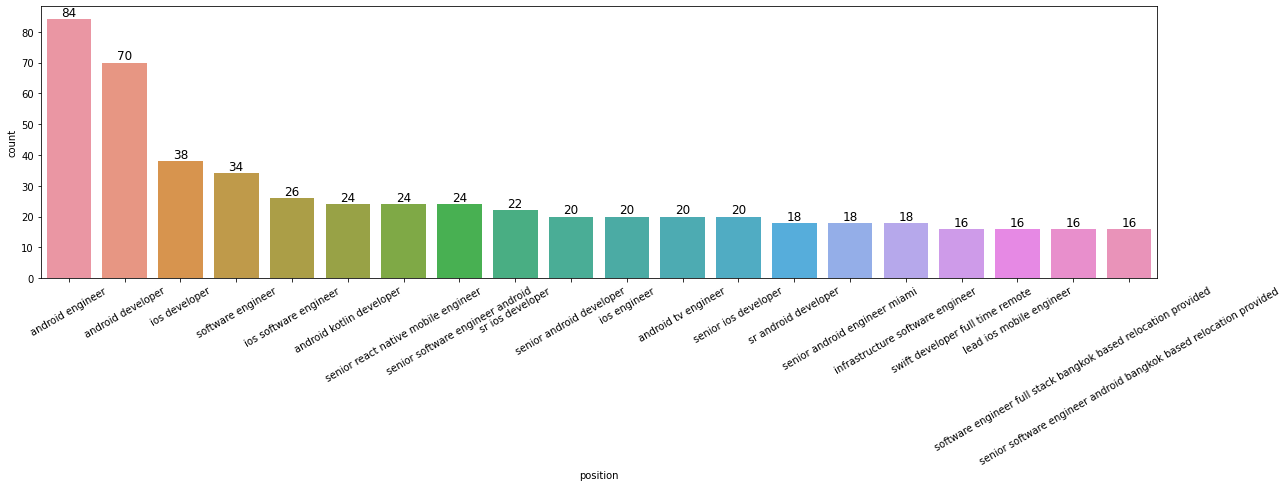

In [17]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [18]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [19]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [20]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [21]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [22]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,232
1,android,192
2,programming language,158
3,java,102
4,javascript,86
5,css,80
6,kotlin,54
7,ios,52
8,html,48
9,microsoft excel,38


In [23]:
'swift' in x['skill']

False

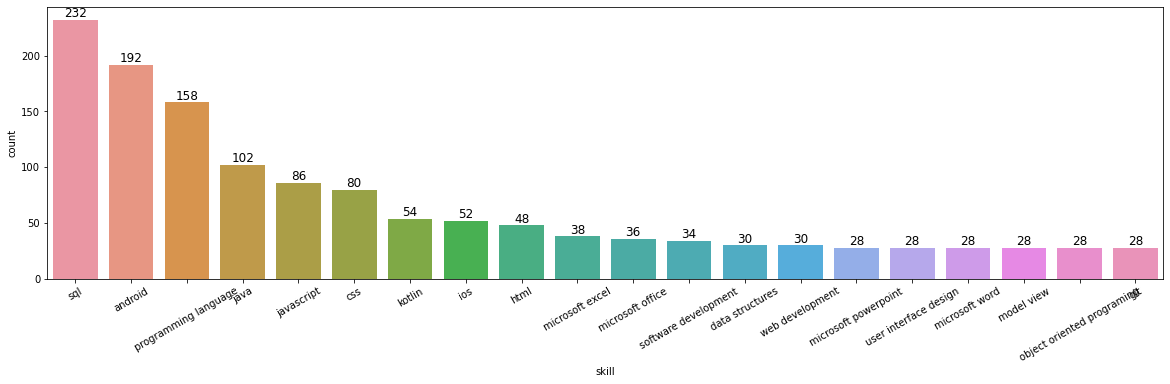

In [24]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [25]:
skills = x['skill']
skills = list(skills.values)

In [26]:
skills.append('swift')

In [27]:
other_skills = ['xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [28]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [29]:
import re

In [30]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [31]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [32]:
skills_count

,skill,count
0,android,1028
1,ios,1004
2,unity,990
3,java,854
4,git,706
5,management,630
6,kotlin,580
7,integration,530
8,mobile application,522
9,mobile applications,410


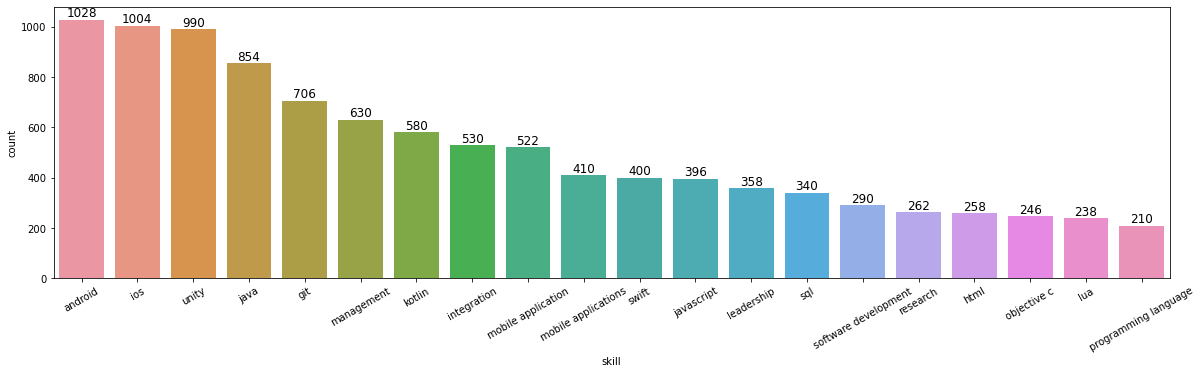

In [33]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [34]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [35]:
df['position'].value_counts()

android engineer                                                                                      84
android developer                                                                                     70
ios developer                                                                                         38
software engineer                                                                                     34
ios software engineer                                                                                 26
android kotlin developer                                                                              24
senior react native mobile engineer                                                                   24
senior software engineer android                                                                      24
sr ios developer                                                                                      22
senior android developer                               

In [36]:
def iOS_android_positions(x):
    if 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    else:
        return 'other'    

In [37]:
df['platform'] = df['position'].apply(iOS_android_positions)

# iOS Analysis

In [38]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(282, 16)

In [39]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,242
1,swift,224
2,objective c,144
3,android,142
4,unity,128
5,mobile application,124
6,integration,106
7,mobile applications,98
8,git,92
9,java,86


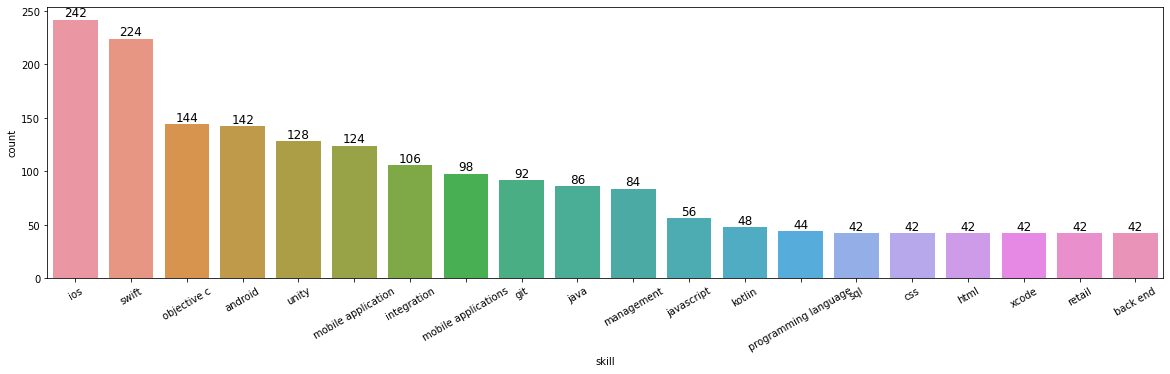

In [40]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

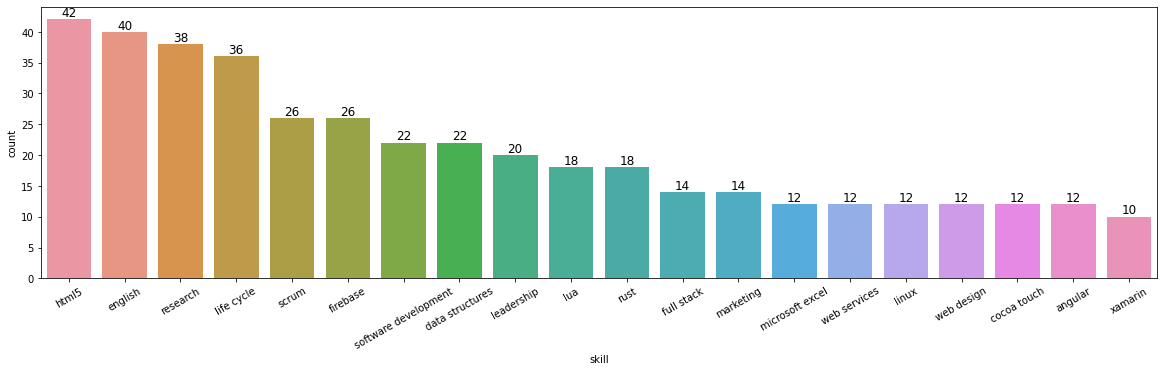

In [41]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.iloc[20:40])
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [42]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,recruiting from scratch,26
1,ziprecruiter,26
2,globant,24
3,twitter,22
4,finxflo,20
5,diverse lynx,20
6,perficient,16
7,agoda,14
8,dice,14
9,rose international,12


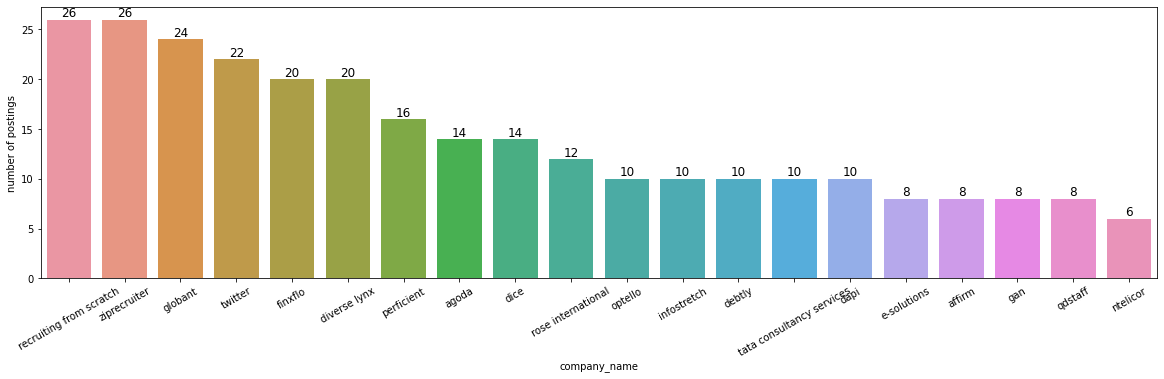

In [43]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [44]:
android_df = df[df['platform']=='android']
android_df.shape

(470, 16)

In [45]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android

,skill,count
0,android,466
1,java,360
2,kotlin,338
3,unity,288
4,mobile application,192
5,mobile applications,180
6,git,176
7,management,166
8,ios,156
9,android sdk,154


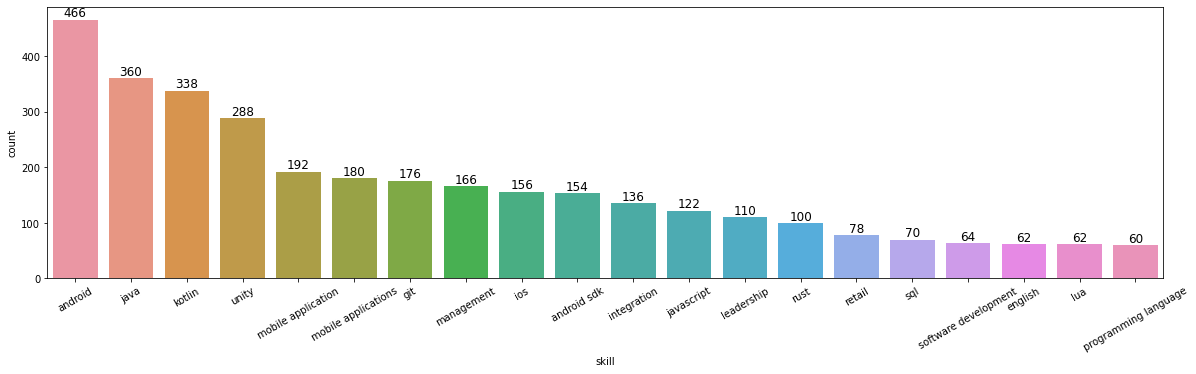

In [46]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [47]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,twitter,40
1,globant,36
2,dice,32
3,tekpartners,30
4,salesforce,28
5,recruiting from scratch,28
6,agoda,26
7,affirm,24
8,reef,18
9,incode technologies,18


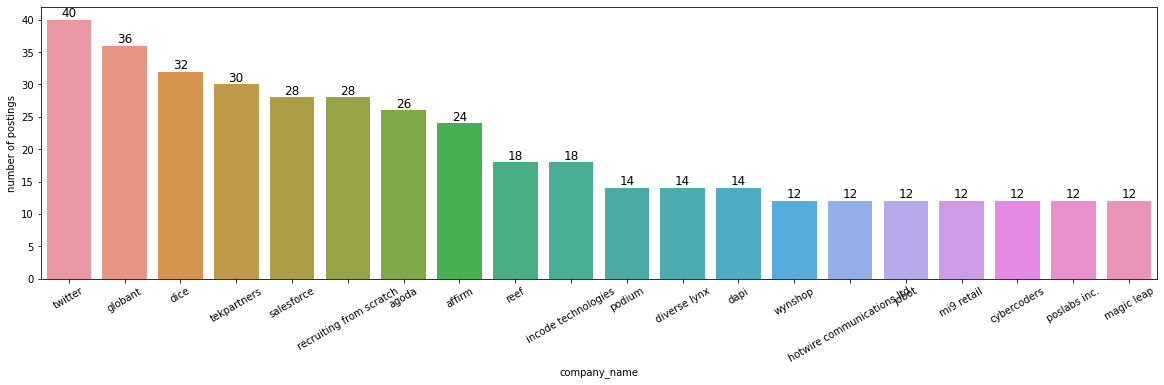

In [48]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()